<a href="https://colab.research.google.com/github/sanjanareddyd9/aiml_preconference/blob/main/AnimalDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle


In [3]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  inflating

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)
#rescale=1./255 means transform every pixel value from range [0,255] -> [0,1].

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
X_train=train_datagen.flow_from_directory("/content/dataset/Training",target_size=(128,128),batch_size=4)

Found 1238 images belonging to 4 classes.


In [7]:
X_test=test_datagen.flow_from_directory("/content/dataset/Testing",target_size=(128,128),class_mode='categorical',batch_size=4)

Found 326 images belonging to 4 classes.


In [8]:
#ModelBuilding
model=Sequential()

In [9]:
#1)convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
#1)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
#2)convolution layer
model.add(Convolution2D(32,(3,3),activation='relu'))

In [12]:
#2)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
#Flatten layer
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (

In [15]:
model.add(Dense(300,activation='relu'))#hidden layer
model.add(Dense(150,activation='relu'))#hidden layer
model.add(Dense(4,activation='softmax'))#output layer

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [17]:
# training the model
model.fit_generator(X_train,steps_per_epoch=len(X_train),epochs=30,validation_data=X_test,validation_steps=len(X_test))


Epoch 1/30


<ipython-input-17-9487c4c2cd48>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,steps_per_epoch=len(X_train),epochs=30,validation_data=X_test,validation_steps=len(X_test))


310/310 [==============================] - 16s 27ms/step - loss: 1.3312 - accuracy: 0.3578 - val_loss: 1.1577 - val_accuracy: 0.5184
Epoch 2/30
310/310 [==============================] - 9s 30ms/step - loss: 1.0719 - accuracy: 0.5210 - val_loss: 0.8029 - val_accuracy: 0.7025
Epoch 3/30
310/310 [==============================] - 9s 30ms/step - loss: 0.8082 - accuracy: 0.6559 - val_loss: 0.6904 - val_accuracy: 0.7515
Epoch 4/30
310/310 [==============================] - 9s 27ms/step - loss: 0.6413 - accuracy: 0.7456 - val_loss: 0.4235 - val_accuracy: 0.8497
Epoch 5/30
310/310 [==============================] - 8s 26ms/step - loss: 0.5207 - accuracy: 0.8005 - val_loss: 0.1975 - val_accuracy: 0.9356
Epoch 6/30
310/310 [==============================] - 10s 32ms/step - loss: 0.3790 - accuracy: 0.8554 - val_loss: 0.1527 - val_accuracy: 0.9479
Epoch 7/30
310/310 [==============================] - 10s 31ms/step - loss: 0.3136 - accuracy: 0.8869 - val_loss: 0.1618 - val_accuracy: 0.9448
Epoch 8

In [18]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
#testing
import numpy as np
from keras.preprocessing import image

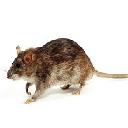

In [20]:
img = image.load_img('/content/dataset/Testing/rats/Z (1).jpeg',target_size=(128,128))
img

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 261ms/step


'rats'

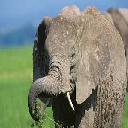

In [22]:
#testing 2
img = image.load_img('/content/dataset/Testing/elephants/Z (1).jpeg',target_size =(128,128))
img

In [23]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 71ms/step


'elephants'

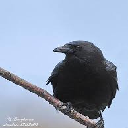

In [24]:
#testing 3
img = image.load_img('/content/dataset/Testing/crows/Z1  (27).jpg',target_size =(128,128))
img

In [25]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 61ms/step


'crows'

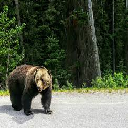

In [27]:
#testing 4
img = image.load_img('/content/dataset/Testing/bears/k4 (100).jpeg',target_size =(128,128))
img

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 69ms/step


'bears'